<a href="https://colab.research.google.com/github/Zarathos01/Machine-learning-is-fun/blob/main/Car%20Prices%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Importing data

In [ ]:
!unzip car-price-dataset.zip

Archive:  car-price-dataset.zip
  inflating: car_price_dataset.csv   


In [ ]:
cp = pd.read_csv('/content/car_price_dataset.csv')

# EDA and data preprocessing

In [ ]:
cp

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [ ]:
cp.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [ ]:
cp.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [ ]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [ ]:
cp.isnull().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [ ]:
cp.duplicated().sum()

0

In [ ]:
cp.drop(columns=['Doors','Model','Brand'], inplace=True)

In [ ]:
cp

,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Owner_Count,Price
0,2020,4.2,Diesel,Manual,289944,5,8501
1,2012,2.0,Hybrid,Automatic,5356,3,12092
2,2020,4.2,Diesel,Automatic,231440,2,11171
3,2023,2.0,Electric,Manual,160971,1,11780
4,2003,2.6,Hybrid,Semi-Automatic,286618,3,2867
...,...,...,...,...,...,...,...
9995,2004,3.7,Diesel,Semi-Automatic,5794,4,8884
9996,2002,1.4,Electric,Automatic,168000,1,6240
9997,2010,3.0,Petrol,Automatic,86664,1,9866
9998,2002,1.4,Hybrid,Automatic,225772,1,4084


# Encoding categorical data

In [ ]:
cp[('Fuel_Type')].value_counts()

,count
Fuel_Type,
Electric,2625
Diesel,2512
Hybrid,2453
Petrol,2410


In [ ]:
cp[('Transmission')].value_counts()

,count
Transmission,
Manual,3372
Automatic,3317
Semi-Automatic,3311


# Encoding Categorical data

In [ ]:
le = LabelEncoder()

for i in cp.columns:
  if cp[i].dtype == 'object':
    cp[i] = le.fit_transform(cp[i])
cp

,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Owner_Count,Price
0,2020,4.2,0,1,289944,5,8501
1,2012,2.0,2,0,5356,3,12092
2,2020,4.2,0,0,231440,2,11171
3,2023,2.0,1,1,160971,1,11780
4,2003,2.6,2,2,286618,3,2867
...,...,...,...,...,...,...,...
9995,2004,3.7,0,2,5794,4,8884
9996,2002,1.4,1,0,168000,1,6240
9997,2010,3.0,3,0,86664,1,9866
9998,2002,1.4,2,0,225772,1,4084


# Data Visualization

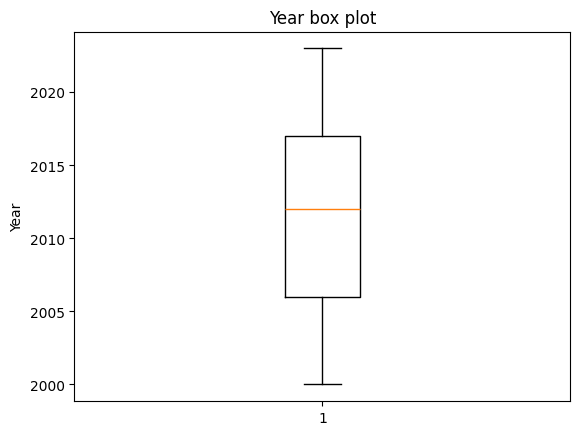

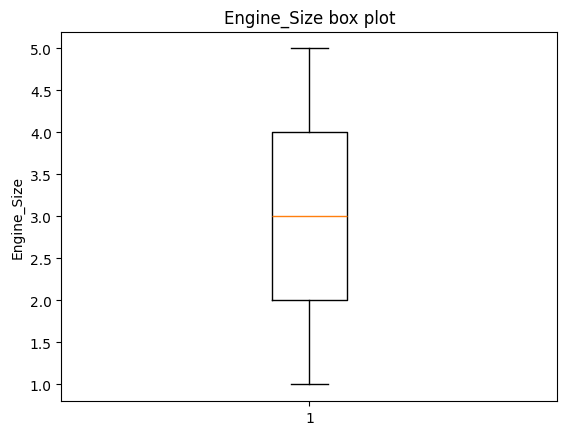

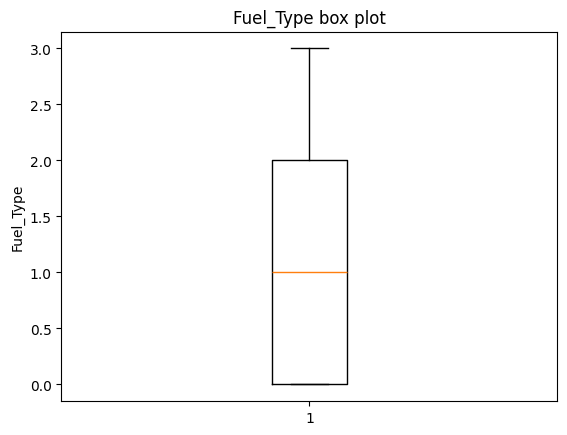

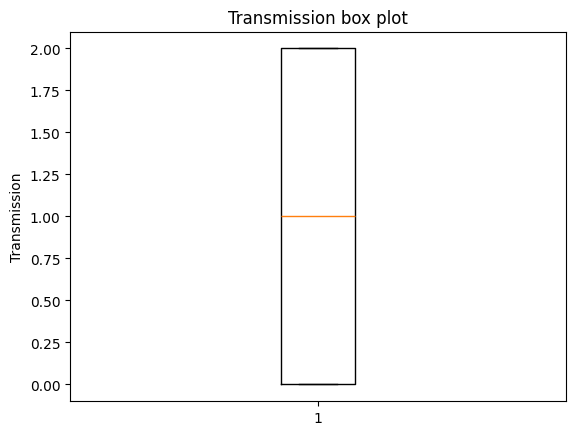

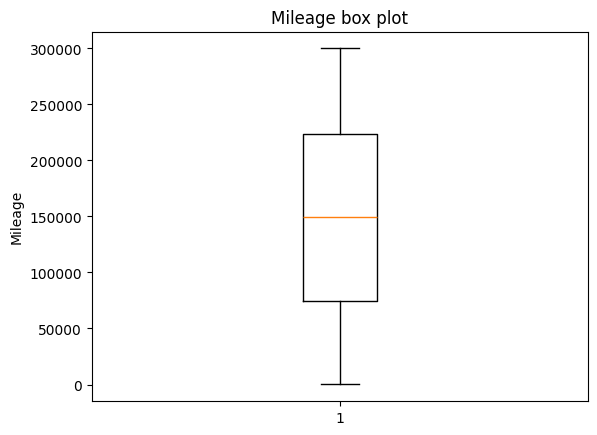

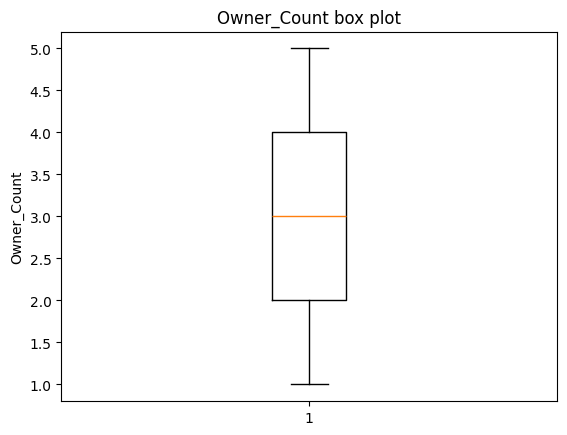

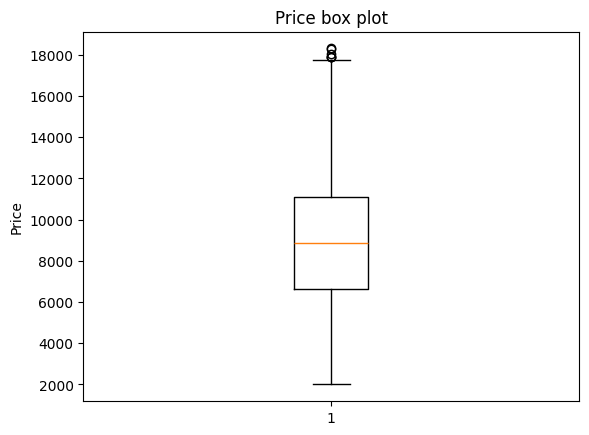

In [ ]:
for i in cp.columns:
  plt.boxplot(cp[i])
  print("\n")
  plt.title(i + " box plot")
  plt.ylabel(i)
  plt.show()

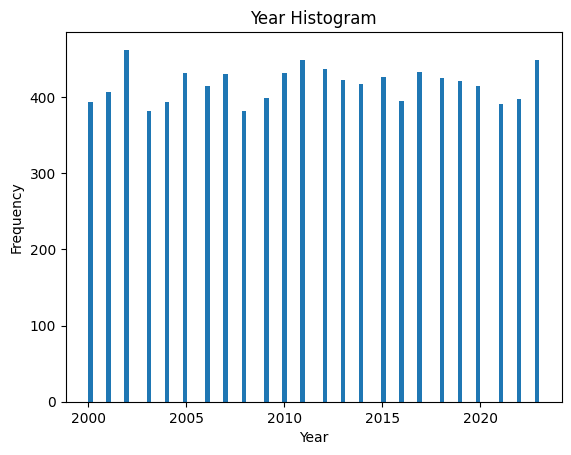

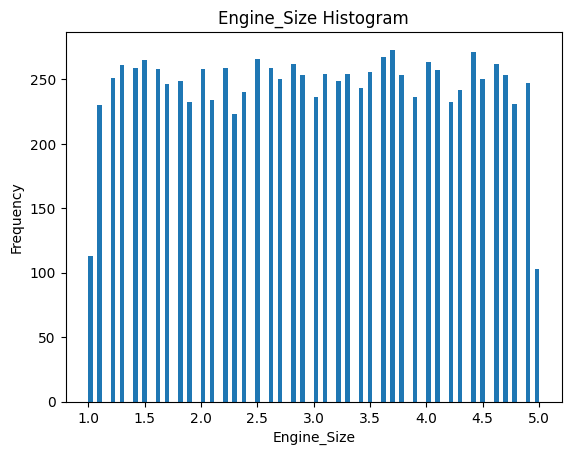

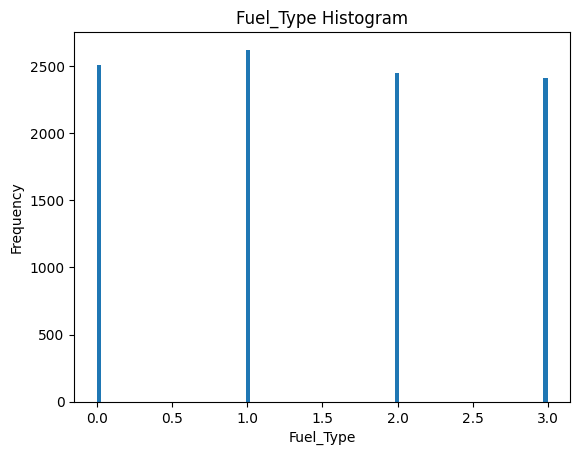

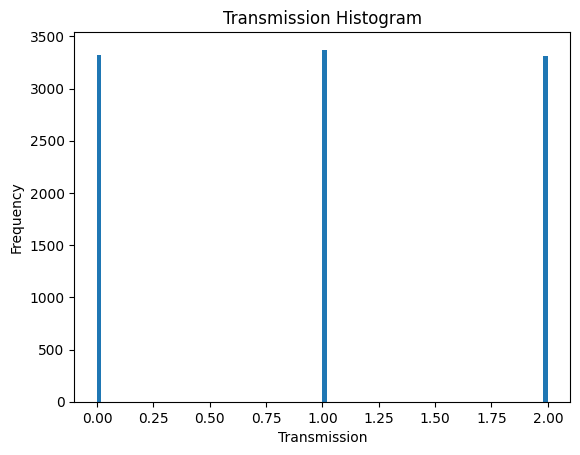

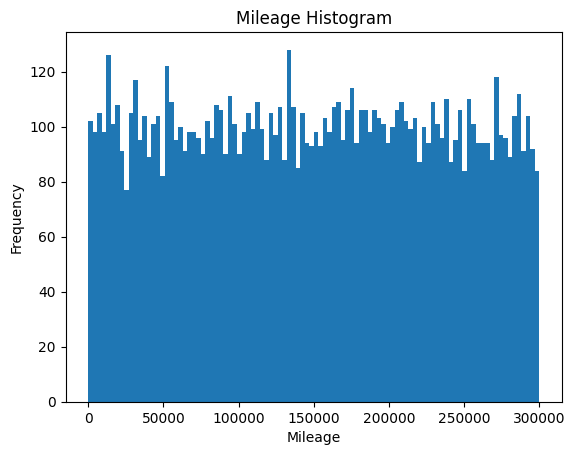

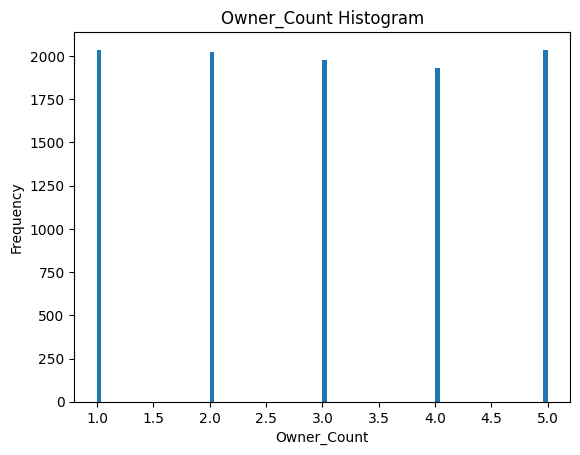

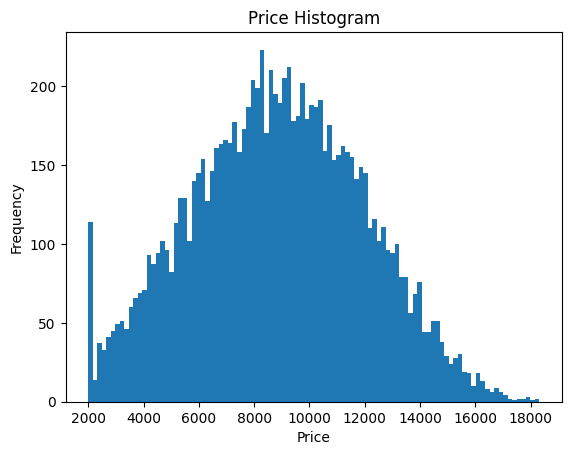

In [ ]:
for i in cp.columns:
  plt.hist(cp[i], bins = 100)
  print("\n")
  plt.title(i + " Histogram")
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()

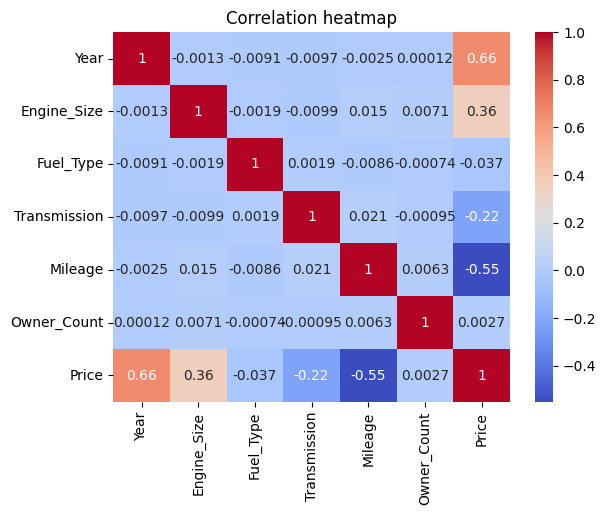

In [ ]:
sns.heatmap(cp.corr(), annot = True, cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

# Linear regression

In [ ]:
X = cp.drop(columns=['Price'])
y = cp['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 818240.5297007328
R-squared: 0.9109428291334879


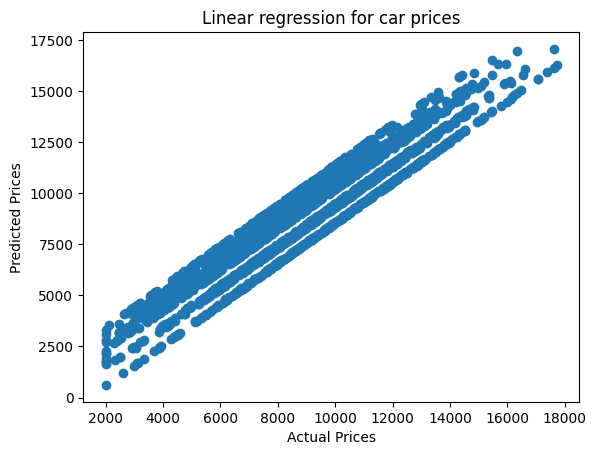

In [ ]:
predicted_prices = model.predict(X_test)
plt.scatter(y_test, predicted_prices)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear regression for car prices")
plt.show()

# Polynomial regression

In [ ]:
poly_feat = PolynomialFeatures(degree=2)
X_train_poly = poly_feat.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_poly, y_train)
poly_pred = model.predict(X_train_poly)

poly_mse = mean_squared_error(y_train, poly_pred)
poly_r2 = r2_score(y_train, poly_pred)
print("Mean Squared Error(poly):", poly_mse)
print("R-squared(poly):", poly_r2)

Mean Squared Error(poly): 119895.10565397209
R-squared(poly): 0.987777313327993


# Ridge regression

In [ ]:
RR = Ridge(alpha=1.0)
RR.fit(X_train, y_train)
ridge_pred = RR.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print("Mean Squared Error(ridge):", ridge_mse)
print("R-squared(ridge):", ridge_r2)

Mean Squared Error(ridge): 818218.3071426647
R-squared(ridge): 0.9109452478332212


# Lasso regression

In [ ]:
LR = Lasso(alpha=1.0)
LR.fit(X_train, y_train)
lasso_pred = LR.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print("Mean Squared Error(lasso):", lasso_mse)
print("R-squared(lasso):", lasso_r2)

Mean Squared Error(lasso): 818073.1406993332
R-squared(lasso): 0.910961047726136


# ElasticNet regression

In [ ]:
EN = ElasticNet(alpha=1.0, l1_ratio=0.5)
EN.fit(X_train, y_train)
elastic_pred = EN.predict(X_test)
EN_mse = mean_squared_error(y_test, elastic_pred)
EN_r2 = r2_score(y_test, elastic_pred)
print("Mean Squared Error(EN):", EN_mse)
print("R-squared(EN):", EN_r2)

Mean Squared Error(EN): 924363.8413018015
R-squared(EN): 0.8993923845501168
